# Imports

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd       
import os 
import math 
import seaborn as sns
sns.set()
import numpy as np
import matplotlib.pyplot as plt  
import IPython.display as ipd  # To play sound in the notebook
import librosa
import librosa.display
import os
path = "/content/drive/My Drive/DLAS/data/speech-accent-archive"
os.chdir(path)
os.listdir()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


['recordings',
 'reading-passage.txt',
 'speakers_all.csv',
 'speaker_info_final.csv',
 'model.png']

# EDA on info about speakers

In [0]:
#load info 
df = pd.read_csv("speakers_all.csv")
df = df.drop(["Unnamed: 9","Unnamed: 10","Unnamed: 11"], axis=1)
df.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?
0,24.0,12.0,"koussi, senegal",balanta,balanta,male,788,senegal,True
1,18.0,10.0,"buea, cameroon",cameroon,cameroon,male,1953,cameroon,True
2,48.0,8.0,"hong, adamawa, nigeria",fulfulde,fulfulde,male,1037,nigeria,True
3,42.0,42.0,"port-au-prince, haiti",haitian,haitian,male,1165,haiti,True
4,40.0,35.0,"port-au-prince, haiti",haitian,haitian,male,1166,haiti,True


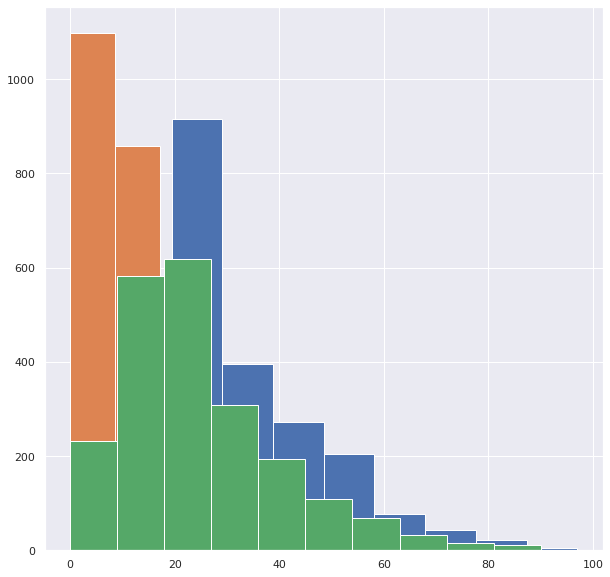

In [0]:
df.age.hist(figsize=(10,10))
df.age_onset.hist(figsize=(10,10))
(df.age - df.age_onset).hist(figsize=(10,10))

In [0]:
df.groupby("native_language")['age'].describe().sort_values(by=['count'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
native_language,,,,,,,,
english,579.0,34.482729,16.734510,6.0,21.00,29.0,44.0,90.0
spanish,162.0,34.129630,13.972528,17.0,23.00,30.0,45.0,80.0
arabic,102.0,30.950980,12.047248,18.0,21.25,28.0,38.0,70.0
mandarin,65.0,30.015385,8.193924,18.0,24.00,28.0,34.0,53.0
french,63.0,33.333333,16.246091,18.0,21.00,27.0,39.0,78.0
...,...,...,...,...,...,...,...,...
ife,1.0,30.000000,NaN,30.0,30.00,30.0,30.0,30.0
ilonggo,1.0,53.000000,NaN,53.0,53.00,53.0,53.0,53.0
irish,1.0,28.000000,NaN,28.0,28.00,28.0,28.0,28.0


In [0]:
df.groupby("country")['age'].describe().sort_values(by=['count'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
usa,393.0,35.652672,18.044364,6.0,21.00,29.0,47.0,90.0
china,88.0,29.477273,9.654940,18.0,23.00,27.0,33.0,72.0
uk,67.0,33.104478,14.900818,18.0,20.00,30.0,38.0,71.0
india,59.0,30.864407,11.501810,18.0,22.00,28.0,35.0,64.0
canada,54.0,31.629630,14.713998,18.0,21.25,26.5,37.5,78.0
...,...,...,...,...,...,...,...,...
chad,1.0,21.000000,NaN,21.0,21.00,21.0,21.0,21.0
burundi,1.0,36.000000,NaN,36.0,36.00,36.0,36.0,36.0
the bahamas,1.0,19.000000,NaN,19.0,19.00,19.0,19.0,19.0


In [0]:
df.groupby("sex")['age'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
famale,1.0,65.000000,NaN,65.0,65.0,65.0,65.0,65.0
female,1048.0,34.072519,15.337869,0.0,22.0,29.0,43.0,89.0
male,1123.0,32.197240,13.492936,0.0,22.0,28.0,39.0,97.0


In [0]:
df.groupby("birthplace")['age'].describe().sort_values(by=['count'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
birthplace,,,,,,,,
"seoul, south korea",25.0,32.040000,12.300000,18.0,23.0,27.0,40.00,62.0
"skopje, macedonia",21.0,20.047619,1.160870,19.0,19.0,20.0,20.00,24.0
"hong kong, china",19.0,23.473684,4.753577,18.0,19.5,22.0,27.00,33.0
"addis ababa, ethiopia",16.0,28.875000,8.663140,20.0,22.5,27.5,31.00,52.0
"bogota, colombia",14.0,36.785714,20.881271,17.0,21.0,30.5,48.25,80.0
...,...,...,...,...,...,...,...,...
"jalandhar, india",1.0,42.000000,NaN,42.0,42.0,42.0,42.00,42.0
"jalisco, mexico",1.0,45.000000,NaN,45.0,45.0,45.0,45.00,45.0
"jammu, kashmir, india",1.0,25.000000,NaN,25.0,25.0,25.0,25.00,25.0


In [0]:
df.groupby("file_missing?")['age'].describe().sort_values(by=['count'],ascending=False)

,count,mean,std,min,25%,50%,75%,max
file_missing?,,,,,,,,
False,2140.0,33.080607,14.444245,0.0,22.0,28.0,41.0,97.0
True,32.0,35.562500,15.063173,18.0,24.0,35.0,42.0,73.0


In [0]:
print (len(set([name for name in os.listdir('recordings/recordings')])))

2147


In [0]:
df.groupby("filename")['age'].describe().sort_values(by=['count'],ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
filename,,,,,,,,
haitian,6.0,36.333333,13.952300,18.0,25.75,41.0,42.75,54.0
swiss,5.0,30.200000,8.318654,21.0,24.00,30.0,34.00,42.0
nicaragua,4.0,37.000000,12.569805,20.0,32.75,39.0,43.25,50.0
jamaican,3.0,36.333333,28.307832,19.0,20.00,21.0,45.00,69.0
liberian,2.0,33.000000,7.071068,28.0,30.50,33.0,35.50,38.0
hawai'i,2.0,71.000000,2.828427,69.0,70.00,71.0,72.00,73.0
afrikaans1,1.0,27.000000,NaN,27.0,27.00,27.0,27.00,27.0
mandarin46,1.0,43.000000,NaN,43.0,43.00,43.0,43.00,43.0
mandarin42,1.0,47.000000,NaN,47.0,47.00,47.0,47.00,47.0


In [0]:
df.groupby("filename")['file_missing?'].describe().sort_values(by=['count'],ascending=False).head(10)

,count,unique,top,freq
filename,,,,
haitian,6,1,True,6
swiss,5,1,True,5
nicaragua,4,2,True,3
jamaican,3,1,True,3
liberian,2,1,True,2
hawai'i,2,1,True,2
afrikaans1,1,1,False,1
mandarin46,1,1,False,1
mandarin42,1,1,False,1


In [0]:
fname3 = 'recordings/recordings/' + 'agni1.mp3'   
ipd.Audio(fname3)

In [0]:
df_names = pd.read_csv("recordings/file_names.txt", names=["file_name"])
df_names["name"] = df_names["file_name"].apply(lambda x: x.split(".")[0])
df_names

,file_name,name
0,afrikaans1.mp3,afrikaans1
1,afrikaans2.mp3,afrikaans2
2,afrikaans3.mp3,afrikaans3
3,afrikaans4.mp3,afrikaans4
4,afrikaans5.mp3,afrikaans5
...,...,...
2133,yoruba3.mp3,yoruba3
2134,yoruba4.mp3,yoruba4
2135,yoruba5.mp3,yoruba5
2136,yupik1.mp3,yupik1


In [0]:
set(df_names.name).symmetric_difference(set(df.filename))

{'balanta',
 'cameroon',
 'fulfulde',
 'haitian',
 "hawai'i",
 'jamaican',
 'liberian',
 'nicaragua',
 'northern',
 'poonchi1',
 'sinhalese1',
 'sinhalese2',
 'sinhalese3',
 'sinhalese4',
 'sinhalese5',
 'swiss',
 'tetun-dili1',
 'tok'}

In [0]:
set(df_names.name) - set(df.filename)

set()

In [0]:
set(df.filename) - set(df_names.name)

{'balanta',
 'cameroon',
 'fulfulde',
 'haitian',
 "hawai'i",
 'jamaican',
 'liberian',
 'nicaragua',
 'northern',
 'poonchi1',
 'sinhalese1',
 'sinhalese2',
 'sinhalese3',
 'sinhalese4',
 'sinhalese5',
 'swiss',
 'tetun-dili1',
 'tok'}

In [0]:
df["name"] = df["filename"]
df_final = df.merge(df_names, how="inner", on="name")
df_final

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,name,file_name
0,27.0,9.0,"virginia, south africa",afrikaans1,afrikaans,female,1,south africa,False,afrikaans1,afrikaans1.mp3
1,40.0,5.0,"pretoria, south africa",afrikaans2,afrikaans,male,2,south africa,False,afrikaans2,afrikaans2.mp3
2,43.0,4.0,"pretoria, transvaal, south africa",afrikaans3,afrikaans,male,418,south africa,False,afrikaans3,afrikaans3.mp3
3,26.0,8.0,"pretoria, south africa",afrikaans4,afrikaans,male,1159,south africa,False,afrikaans4,afrikaans4.mp3
4,19.0,6.0,"cape town, south africa",afrikaans5,afrikaans,male,1432,south africa,False,afrikaans5,afrikaans5.mp3
...,...,...,...,...,...,...,...,...,...,...,...
2133,46.0,5.0,"lagos, nigeria",yoruba3,yoruba,female,766,nigeria,False,yoruba3,yoruba3.mp3
2134,46.0,12.0,"lagos, nigeria",yoruba4,yoruba,male,851,nigeria,False,yoruba4,yoruba4.mp3
2135,47.0,2.0,"ibadan, nigeria",yoruba5,yoruba,female,2023,nigeria,False,yoruba5,yoruba5.mp3
2136,31.0,1.0,"bethel, alaska, usa",yupik1,yupik,female,571,usa,False,yupik1,yupik1.mp3


In [0]:
df_final["file_missing?"].value_counts()

False    2138
Name: file_missing?, dtype: int64

In [0]:
df_final["speakerid"].value_counts()

2047    1
1328    1
1300    1
1302    1
1304    1
       ..
601     1
603     1
605     1
607     1
2049    1
Name: speakerid, Length: 2138, dtype: int64

In [0]:
df_final = df_final.drop(["speakerid","name","filename","file_missing?"], axis=1)
df_final

,age,age_onset,birthplace,native_language,sex,country,file_name
0,27.0,9.0,"virginia, south africa",afrikaans,female,south africa,afrikaans1.mp3
1,40.0,5.0,"pretoria, south africa",afrikaans,male,south africa,afrikaans2.mp3
2,43.0,4.0,"pretoria, transvaal, south africa",afrikaans,male,south africa,afrikaans3.mp3
3,26.0,8.0,"pretoria, south africa",afrikaans,male,south africa,afrikaans4.mp3
4,19.0,6.0,"cape town, south africa",afrikaans,male,south africa,afrikaans5.mp3
...,...,...,...,...,...,...,...
2133,46.0,5.0,"lagos, nigeria",yoruba,female,nigeria,yoruba3.mp3
2134,46.0,12.0,"lagos, nigeria",yoruba,male,nigeria,yoruba4.mp3
2135,47.0,2.0,"ibadan, nigeria",yoruba,female,nigeria,yoruba5.mp3
2136,31.0,1.0,"bethel, alaska, usa",yupik,female,usa,yupik1.mp3


In [0]:
df_final.to_csv("speaker_info_final.csv", header=True, index=False)

# Plots about information of the speakers

In [0]:
# Checking if embeddings order is equal to csv info order (to get labels correctly)
speakers_info = pd.read_csv('speaker_info_final.csv')
speakers_info['sex'] = speakers_info['sex'].replace({'famale':'female'})

bins = [0, 18, 25, 35, 45, 55, 65, np.inf]
names = ['0-18', '18-25', '25-35', '35-45', '45-55', '55-65', '65+']
speakers_info['age_range'] = pd.cut(speakers_info['age'], bins, labels=names)

speakers_info["native?"] = speakers_info["native_language"] == "english"

speakers_info = speakers_info.sort_values('file_name')
speakers_info["filename_wav"] = speakers_info["file_name"].apply(lambda x: x.split(".")[0]+".wav")

speakers_info.head()

,age,age_onset,birthplace,native_language,sex,country,file_name,age_range,native?,filename_wav
0,27.0,9.0,"virginia, south africa",afrikaans,female,south africa,afrikaans1.mp3,25-35,False,afrikaans1.wav
1,40.0,5.0,"pretoria, south africa",afrikaans,male,south africa,afrikaans2.mp3,35-45,False,afrikaans2.wav
2,43.0,4.0,"pretoria, transvaal, south africa",afrikaans,male,south africa,afrikaans3.mp3,35-45,False,afrikaans3.wav
3,26.0,8.0,"pretoria, south africa",afrikaans,male,south africa,afrikaans4.mp3,25-35,False,afrikaans4.wav
4,19.0,6.0,"cape town, south africa",afrikaans,male,south africa,afrikaans5.mp3,18-25,False,afrikaans5.wav


In [0]:
LABEL = "birthplace"
sns.set(style="white", palette="muted", context='notebook')
val_count = speakers_info[LABEL].value_counts().index.tolist()[:8]
sliced = speakers_info.loc[speakers_info[LABEL].isin(val_count)]
sliced

,age,age_onset,birthplace,native_language,sex,country,file_name,age_range,native?,filename_wav
0,27.0,9.0,"virginia, south africa",afrikaans,female,south africa,afrikaans1.mp3,25-35,False,afrikaans1.wav
1,40.0,5.0,"pretoria, south africa",afrikaans,male,south africa,afrikaans2.mp3,35-45,False,afrikaans2.wav
2,43.0,4.0,"pretoria, transvaal, south africa",afrikaans,male,south africa,afrikaans3.mp3,35-45,False,afrikaans3.wav
3,26.0,8.0,"pretoria, south africa",afrikaans,male,south africa,afrikaans4.mp3,25-35,False,afrikaans4.wav
4,19.0,6.0,"cape town, south africa",afrikaans,male,south africa,afrikaans5.mp3,18-25,False,afrikaans5.wav
...,...,...,...,...,...,...,...,...,...,...
2133,46.0,5.0,"lagos, nigeria",yoruba,female,nigeria,yoruba3.mp3,45-55,False,yoruba3.wav
2134,46.0,12.0,"lagos, nigeria",yoruba,male,nigeria,yoruba4.mp3,45-55,False,yoruba4.wav
2135,47.0,2.0,"ibadan, nigeria",yoruba,female,nigeria,yoruba5.mp3,45-55,False,yoruba5.wav
2136,31.0,1.0,"bethel, alaska, usa",yupik,female,usa,yupik1.mp3,25-35,False,yupik1.wav


<Figure size 864x648 with 0 Axes>

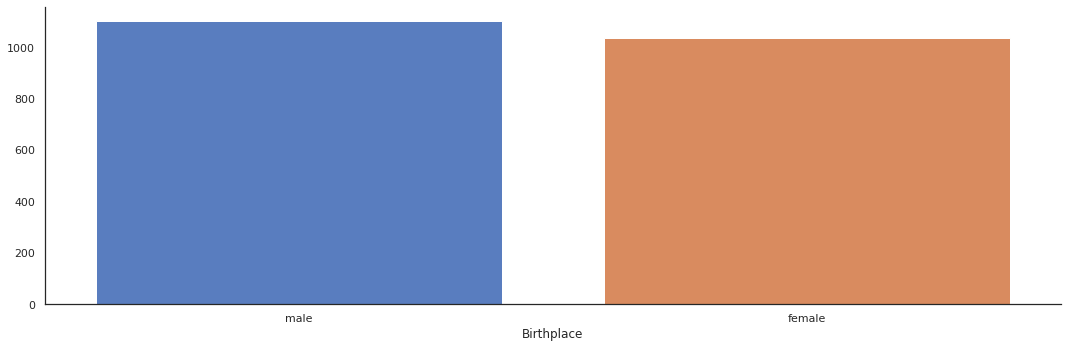

In [0]:
plt.figure(figsize=(12, 9))
g = sns.catplot(x=LABEL, kind="count",  aspect=3, data=sliced, order=val_count)
g.set_axis_labels("Birthplace","")

In [0]:
LABEL = "sex"
COL_LABEL = "native_language"
sns.set(style="white", palette="muted", context='notebook')
val_count = speakers_info[COL_LABEL].value_counts().index.tolist()[:6]
sliced = speakers_info.loc[speakers_info[COL_LABEL].isin(val_count)]
sliced

,age,age_onset,birthplace,native_language,sex,country,file_name,age_range,native?,filename_wav
38,38.0,12.0,"riyadh, saudi arabia",arabic,female,saudi arabia,arabic1.mp3,35-45,False,arabic1.wav
39,26.0,5.0,"cairo, egypt",arabic,male,egypt,arabic10.mp3,25-35,False,arabic10.wav
40,40.0,10.0,"beirut, lebanon",arabic,female,lebanon,arabic100.mp3,35-45,False,arabic100.wav
41,21.0,10.0,"doha, qatar",arabic,male,qatar,arabic101.mp3,18-25,False,arabic101.wav
42,22.0,3.0,"jiddah, saudi arabia",arabic,male,saudi arabia,arabic102.mp3,18-25,False,arabic102.wav
...,...,...,...,...,...,...,...,...,...,...
1908,31.0,21.0,"juarez, mexico",spanish,female,mexico,spanish95.mp3,25-35,False,spanish95.wav
1909,29.0,12.0,"arequipa, peru",spanish,female,peru,spanish96.mp3,25-35,False,spanish96.wav
1910,52.0,19.0,"bogota, colombia",spanish,female,colombia,spanish97.mp3,45-55,False,spanish97.wav
1911,34.0,29.0,"veracruz, mexico",spanish,male,mexico,spanish98.mp3,25-35,False,spanish98.wav


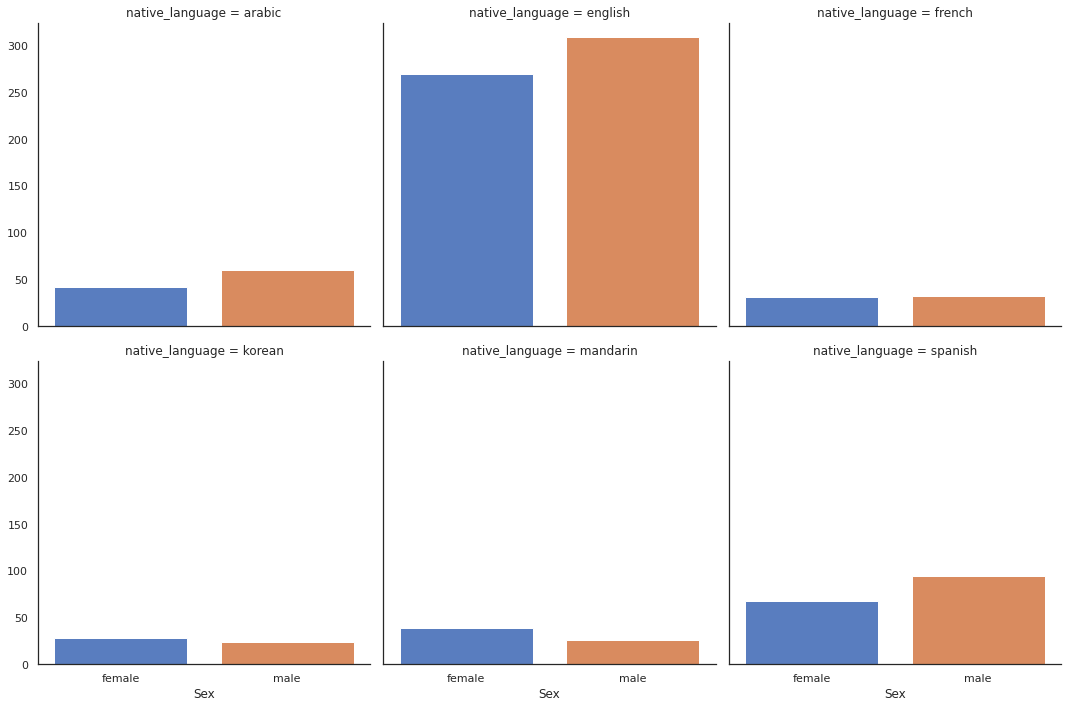

In [0]:
g = sns.catplot(x=LABEL, col=COL_LABEL, col_wrap=3,
                data=sliced, kind="count", 
                aspect=1)
g.set_axis_labels("Sex","")

In [0]:
LABEL = "native_language"
Y_LABEL = "age"
sns.set(style="white", palette="muted", context='notebook')
val_count = speakers_info[LABEL].value_counts().index.tolist()[:7]
sliced = speakers_info.loc[speakers_info[LABEL].isin(val_count)]
sliced

,age,age_onset,birthplace,native_language,sex,country,file_name,age_range,native?,filename_wav
38,38.0,12.0,"riyadh, saudi arabia",arabic,female,saudi arabia,arabic1.mp3,35-45,False,arabic1.wav
39,26.0,5.0,"cairo, egypt",arabic,male,egypt,arabic10.mp3,25-35,False,arabic10.wav
40,40.0,10.0,"beirut, lebanon",arabic,female,lebanon,arabic100.mp3,35-45,False,arabic100.wav
41,21.0,10.0,"doha, qatar",arabic,male,qatar,arabic101.mp3,18-25,False,arabic101.wav
42,22.0,3.0,"jiddah, saudi arabia",arabic,male,saudi arabia,arabic102.mp3,18-25,False,arabic102.wav
...,...,...,...,...,...,...,...,...,...,...
1908,31.0,21.0,"juarez, mexico",spanish,female,mexico,spanish95.mp3,25-35,False,spanish95.wav
1909,29.0,12.0,"arequipa, peru",spanish,female,peru,spanish96.mp3,25-35,False,spanish96.wav
1910,52.0,19.0,"bogota, colombia",spanish,female,colombia,spanish97.mp3,45-55,False,spanish97.wav
1911,34.0,29.0,"veracruz, mexico",spanish,male,mexico,spanish98.mp3,25-35,False,spanish98.wav


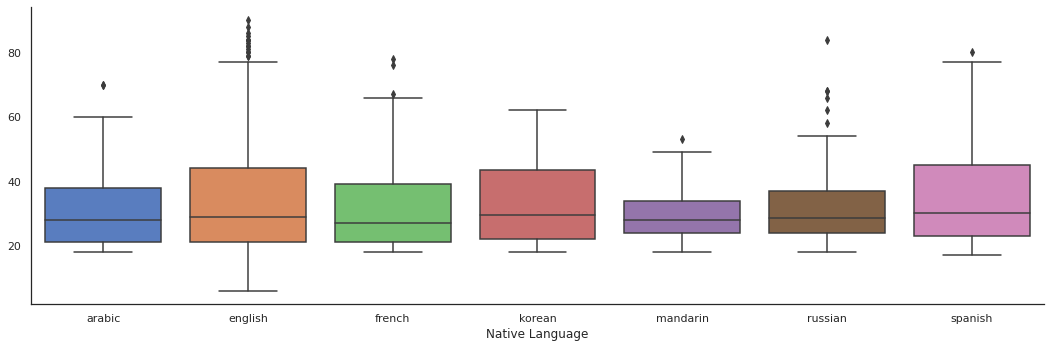

In [0]:
g = sns.catplot(x=LABEL, y=Y_LABEL,
                data=sliced, kind="box", 
                aspect=3)
g.set_axis_labels("Native Language","")

In [0]:
LABEL = "birthplace"
SLICE_LABEL = "country"
SLICE_ARRAY = ["usa"]
sns.set(style="white", palette="muted", context='notebook')
sliced = speakers_info.loc[speakers_info[SLICE_LABEL].isin(SLICE_ARRAY)]
val_count = sliced[LABEL].value_counts().index.tolist()[:5]
sliced

,age,age_onset,birthplace,native_language,sex,country,file_name,age_range,native?,filename_wav
72,19.0,9.0,"shady grove, maryland, usa",arabic,female,usa,arabic38.mp3,18-25,False,arabic38.wav
80,32.0,12.0,"fort collins, colorado, usa",arabic,female,usa,arabic45.mp3,25-35,False,arabic45.wav
116,19.0,3.0,"washington, district of columbia, usa",arabic,female,usa,arabic78.mp3,18-25,False,arabic78.wav
331,42.0,0.0,"pittsburgh, pennsylvania, usa",english,male,usa,english1.mp3,35-45,True,english1.wav
332,35.0,0.0,"davenport, iowa, usa",english,female,usa,english10.mp3,25-35,True,english10.wav
...,...,...,...,...,...,...,...,...,...,...
1948,21.0,6.0,"alexandria, virginia, usa",tagalog,male,usa,tagalog17.mp3,18-25,False,tagalog17.wav
2050,19.0,5.0,"woodbridge, virginia, usa",twi,male,usa,twi5.mp3,18-25,False,twi5.wav
2078,20.0,5.0,"alexandria, virginia, usa",urdu,female,usa,urdu9.mp3,18-25,False,urdu9.wav
2128,52.0,5.0,"brooklyn, new york, usa",yiddish,male,usa,yiddish3.mp3,45-55,False,yiddish3.wav


In [0]:
val_count

['washington, district of columbia, usa',
 'brooklyn, new york, usa',
 'boston, massachusetts, usa',
 'chicago, illinois, usa',
 'washington, dc, usa']

<Figure size 864x648 with 0 Axes>

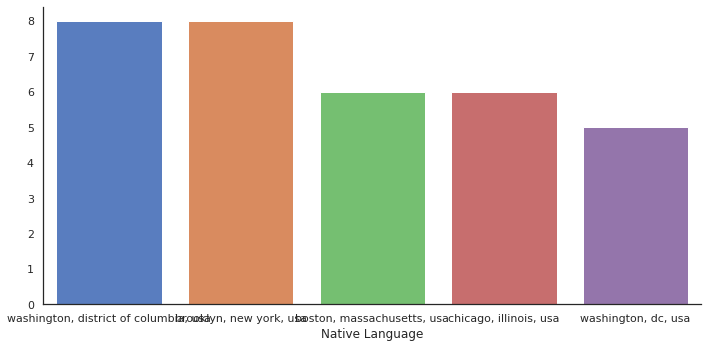

In [0]:
plt.figure(figsize=(12, 9))
g = sns.catplot(x=LABEL, kind="count",  aspect=2, data=sliced, order=val_count)
g.set_axis_labels("Native Language","")

# Audio-based EDA

In [0]:
speakers_info.loc[speakers_info["birthplace"] == "boston, massachusetts, usa"]

,age,age_onset,birthplace,native_language,sex,country,file_name,age_range,native?,filename_wav
447,63.0,0.0,"boston, massachusetts, usa",english,female,usa,english203.mp3,55-65,True,english203.wav
454,37.0,0.0,"boston, massachusetts, usa",english,female,usa,english21.mp3,35-45,True,english21.wav
497,29.0,0.0,"boston, massachusetts, usa",english,female,usa,english249.mp3,25-35,True,english249.wav
757,19.0,0.0,"boston, massachusetts, usa",english,male,usa,english483.mp3,18-25,True,english483.wav
884,18.0,0.0,"boston, massachusetts, usa",english,female,usa,english76.mp3,0-18,True,english76.wav
887,73.0,0.0,"boston, massachusetts, usa",english,male,usa,english79.mp3,65+,True,english79.wav


In [0]:
audio_files = ["english76.mp3","english483.mp3"]

(280780,)
(300061,)


<Figure size 864x576 with 0 Axes>

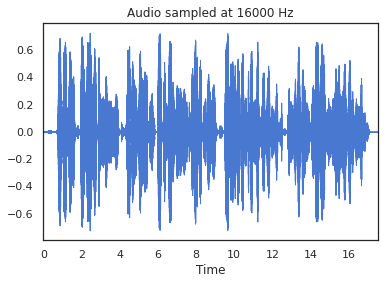

<Figure size 864x576 with 0 Axes>

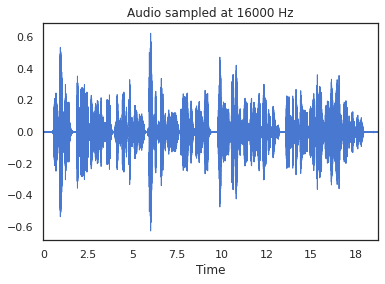

In [0]:
for f in audio_files:

  SAMPLE_RATE = 16000
  fname_m = 'recordings/recordings/' + f
  y, sr = librosa.load(fname_m, sr=SAMPLE_RATE, duration = 35)

  plt.figure(figsize=(12, 8))
  plt.figure()
  librosa.display.waveplot(y, sr=sr)
  plt.title('Audio sampled at 16000 Hz')
  print(y.shape)

(20, 549)
(20, 587)


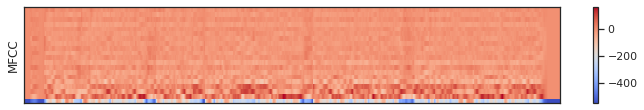

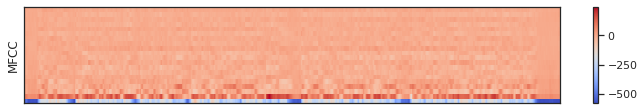

In [0]:
for f in audio_files:

  SAMPLE_RATE = 16000
  fname_f = 'recordings/recordings/' + f 
  y, sr = librosa.load(fname_f, sr=SAMPLE_RATE, duration = 35) # Chop audio at 5 secs... 
  mfcc = librosa.feature.mfcc(y=y, sr=SAMPLE_RATE, n_mfcc = 20) # 5 MFCC components

  plt.figure(figsize=(12, 6))
  plt.subplot(3,1,1)
  librosa.display.specshow(mfcc)
  plt.ylabel('MFCC')
  plt.colorbar()
  print(mfcc.shape)

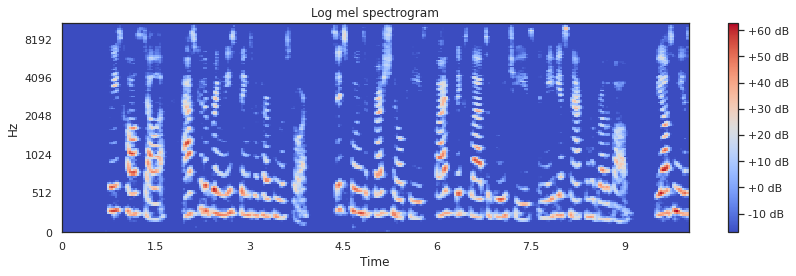

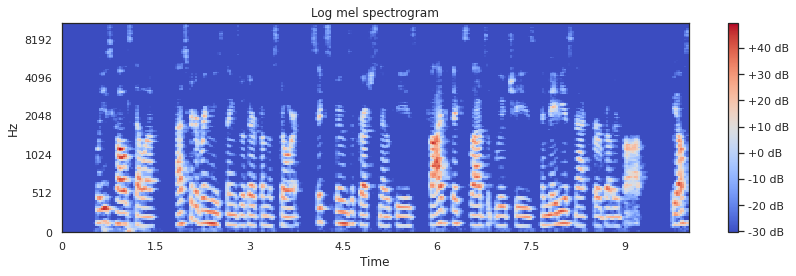

In [0]:
for f in audio_files:

  SAMPLE_RATE = 16000
  fname_f = 'recordings/recordings/' + f 
  y, sr = librosa.load(fname_f, sr=SAMPLE_RATE, duration = 10) # Chop audio at 5 secs... 
  melspec = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

  # Convert to log scale (dB). We'll use the peak power (max) as reference.
  log_S = librosa.amplitude_to_db(melspec)

  plt.figure(figsize=(12,4))
  librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
  plt.title('Log mel spectrogram')
  plt.colorbar(format='%+02.0f dB')
  plt.tight_layout()

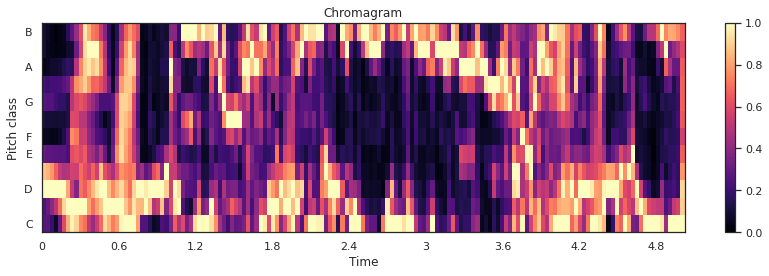

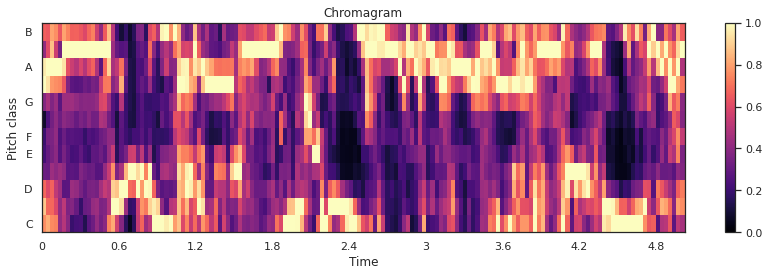

In [0]:
for f in audio_files:
  SAMPLE_RATE = 16000
  fname_f = 'recordings/recordings/' + f 
  y, sr = librosa.load(fname_f, sr=SAMPLE_RATE, duration = 5)
  C = librosa.feature.chroma_cqt(y=y, sr=sr)

  plt.figure(figsize=(12,4))
  # To make sure that the colors span the full range of chroma values, set vmin and vmax
  librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)
  plt.title('Chromagram')
  plt.colorbar()
  plt.tight_layout()



In [0]:
  ipd.Audio('recordings/recordings/' + audio_files[0], rate=16000)

In [0]:
  ipd.Audio('recordings/recordings/' + audio_files[1], rate=16000)